In this notebook, I show how the image width and height can differ depending on which library is used for reading them: PIL, cv2 or the VGG VIA annotation tool (which seems to allign with cv2 for our iamges).

I also removed the orientation attribute from the EXIF metadat and checked what happens:
- PIL still reads the image width and height as those from the original images;
- cv2 reads image width and heigth differently (as those given by PIL on the original images)

In [4]:
import glob
import PIL.ExifTags
from utils_annotation import *

In [10]:
PIL.__version__

'9.0.1'

In [6]:
dir_orig = '/home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data_internal/check_img_statics/problematic_img/with_labels'
dir_edited = '/home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data_internal/check_img_statics/problematic_img/with_labels_edited_orientation'

In [28]:
# Make a copy of the orginal files
! cp -r {dir_orig} {dir_edited}

The 8 EXIF orientation values are numbered 1 to 8.

- 1 = 0 degrees: the correct orientation, no adjustment is required.
- 2 = 0 degrees, mirrored: image has been flipped back-to-front.
- 3 = 180 degrees: image is upside down.
- 4 = 180 degrees, mirrored: image has been flipped back-to-front and is upside down.
- 5 = 90 degrees: image has been flipped back-to-front and is on its side.
- 6 = 90 degrees, mirrored: image is on its side.
- 7 = 270 degrees: image has been flipped back-to-front and is on its far side.
- 8 = 270 degrees, mirrored: image is on its far side.

From: https://sirv.com/help/articles/rotate-photos-to-be-upright/

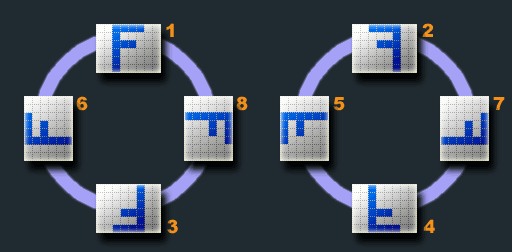

Remove orientation attribute with exiftool

In [29]:
# https://photo.stackexchange.com/questions/99586/how-to-remove-orientation-attribute-from-the-photo-without-touching-other-exif-d
! exiftool -n -overwrite_original -Orientation= {dir_edited}

Error: [minor] InteropIFD pointer references previous ExifIFD directory - /home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data_internal/check_img_statics/problematic_img/with_labels_edited_orientation/Araneae_Linyphiidae_Tenuiphantes_flavipes_1960849752_2109077.jpg
    1 directories scanned
   22 image files updated
    1 files weren't updated due to errors


In [37]:
# Tried to fix the error for this particular image, as suggested here https://exiftool.org/forum/index.php?topic=9315.0,
# but didn't work . For the purpose of this example, this can be neglected though.
! exiftool -n -overwrite_original -F -Orientation= \
'/home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data_internal/check_img_statics/problematic_img/with_labels_edited_orientation/Araneae_Linyphiidae_Tenuiphantes_flavipes_1960849752_2109077.jpg'

Error: [minor] InteropIFD pointer references previous ExifIFD directory - /home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data_internal/check_img_statics/problematic_img/with_labels_edited_orientation/Araneae_Linyphiidae_Tenuiphantes_flavipes_1960849752_2109077.jpg
    0 image files updated
    1 files weren't updated due to errors


Original image metadata as read with PIL:

In [38]:
df_pil_img_orig = get_img_width_height_pil_from_dir(dir_orig, get_orientation=True)
df_pil_img_orig

,file_name,file_path,width_pil,height_pil,orientation_pil
0,Araneae_Linyphiidae_Tenuiphantes_flavipes_1960...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,700,459,8
1,Diptera_Anthomyiidae_Delia_lamelliseta_2075125...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336,8
2,Diptera_Anthomyiidae_Hylemya_vagans_3259993.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,454,8
3,Diptera_Anthomyiidae_Hylemya_variata_3549164.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,606,454,8
4,Diptera_Calliphoridae_Lucilia_silvarum_4219901...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450,8
5,Diptera_Calliphoridae_Pollenia_amentaria_43237...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450,8
6,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336,8
7,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,601,451,8
8,Diptera_Empididae_Empis_acinerea_4297830.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,602,452,8
9,Diptera_Empididae_Empis_acinerea_4297835.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,453,8


Image metadata read with PIL after deleting the orientation attribute:

In [31]:
df_pil_img_edited = get_img_width_height_pil_from_dir(dir_edited, get_orientation=True)
df_pil_img_edited

,file_name,file_path,width_pil,height_pil,orientation_pil
0,Araneae_Linyphiidae_Tenuiphantes_flavipes_1960...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,700,459,8.0
1,Diptera_Anthomyiidae_Delia_lamelliseta_2075125...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336,NaN
2,Diptera_Anthomyiidae_Hylemya_vagans_3259993.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,454,NaN
3,Diptera_Anthomyiidae_Hylemya_variata_3549164.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,606,454,NaN
4,Diptera_Calliphoridae_Lucilia_silvarum_4219901...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450,NaN
5,Diptera_Calliphoridae_Pollenia_amentaria_43237...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450,NaN
6,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336,NaN
7,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,601,451,NaN
8,Diptera_Empididae_Empis_acinerea_4297830.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,602,452,NaN
9,Diptera_Empididae_Empis_acinerea_4297835.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,453,NaN


Original image width & height as read with cv2:

In [32]:
df_cv2_img_orig = get_img_width_height_cv2_from_dir(dir_orig)
df_cv2_img_orig

,file_name,file_path,width_cv2,height_cv2
0,Araneae_Linyphiidae_Tenuiphantes_flavipes_1960...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,459,700
1,Diptera_Anthomyiidae_Delia_lamelliseta_2075125...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,336,448
2,Diptera_Anthomyiidae_Hylemya_vagans_3259993.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,454,605
3,Diptera_Anthomyiidae_Hylemya_variata_3549164.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,454,606
4,Diptera_Calliphoridae_Lucilia_silvarum_4219901...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,450,600
5,Diptera_Calliphoridae_Pollenia_amentaria_43237...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,450,600
6,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,336,448
7,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,451,601
8,Diptera_Empididae_Empis_acinerea_4297830.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,452,602
9,Diptera_Empididae_Empis_acinerea_4297835.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,453,605


Image width & height read with cv2 after deleting the orientation attribute.

Except for the image where exiftools couldn't delete the orrientation attribute, now cv2 flips width with height:

In [49]:
df_cv2_img_edited = get_img_width_height_cv2_from_dir(dir_edited)
df_cv2_img_edited

,file_name,file_path,width_cv2,height_cv2
0,Araneae_Linyphiidae_Tenuiphantes_flavipes_1960...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,459,700
1,Diptera_Anthomyiidae_Delia_lamelliseta_2075125...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336
2,Diptera_Anthomyiidae_Hylemya_vagans_3259993.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,454
3,Diptera_Anthomyiidae_Hylemya_variata_3549164.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,606,454
4,Diptera_Calliphoridae_Lucilia_silvarum_4219901...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450
5,Diptera_Calliphoridae_Pollenia_amentaria_43237...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450
6,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336
7,Diptera_Calliphoridae_Protocalliphora_azurea_2...,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,601,451
8,Diptera_Empididae_Empis_acinerea_4297830.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,602,452
9,Diptera_Empididae_Empis_acinerea_4297835.jpg,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,453


Image width & height as reported by the VGG VIA annotator (exporting COCO annotation):

In [34]:
json_file_path = '/home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data_internal/check_img_statics/problematic_img/with_labels_coco.json'
df_coco = get_img_width_height_from_via_coco(json_file_path)
df_coco

,file_name,width_via,height_via
0,Araneae_Linyphiidae_Tenuiphantes_flavipes_1960...,459,700
1,Diptera_Anthomyiidae_Delia_lamelliseta_2075125...,336,448
2,Diptera_Anthomyiidae_Hylemya_vagans_3259993.jpg,454,605
3,Diptera_Anthomyiidae_Hylemya_variata_3549164.jpg,454,606
4,Diptera_Calliphoridae_Lucilia_silvarum_4219901...,450,600
5,Diptera_Calliphoridae_Pollenia_amentaria_43237...,450,600
6,Diptera_Calliphoridae_Protocalliphora_azurea_2...,336,448
7,Diptera_Calliphoridae_Protocalliphora_azurea_2...,451,601
8,Diptera_Empididae_Empis_acinerea_4297830.jpg,452,602
9,Diptera_Empididae_Empis_acinerea_4297835.jpg,453,605


It matches (at least for these images) how cv2 reads the original images.

In [44]:
df = pd.merge(df_coco, df_cv2_img_orig, on='file_name', how='inner')
df[df['width_via'] != df['width_cv2']] # no records

,file_name,width_via,height_via,file_path,width_cv2,height_cv2


VGG VIA doesn't match with how PIL reads width & height though:

In [47]:
df = pd.merge(df_coco, df_pil_img_orig, on='file_name', how='inner')
df[df['width_via'] != df['width_pil']]

,file_name,width_via,height_via,file_path,width_pil,height_pil,orientation_pil
0,Araneae_Linyphiidae_Tenuiphantes_flavipes_1960...,459,700,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,700,459,8
1,Diptera_Anthomyiidae_Delia_lamelliseta_2075125...,336,448,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336,8
2,Diptera_Anthomyiidae_Hylemya_vagans_3259993.jpg,454,605,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,454,8
3,Diptera_Anthomyiidae_Hylemya_variata_3549164.jpg,454,606,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,606,454,8
4,Diptera_Calliphoridae_Lucilia_silvarum_4219901...,450,600,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450,8
5,Diptera_Calliphoridae_Pollenia_amentaria_43237...,450,600,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,600,450,8
6,Diptera_Calliphoridae_Protocalliphora_azurea_2...,336,448,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,448,336,8
7,Diptera_Calliphoridae_Protocalliphora_azurea_2...,451,601,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,601,451,8
8,Diptera_Empididae_Empis_acinerea_4297830.jpg,452,602,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,602,452,8
9,Diptera_Empididae_Empis_acinerea_4297835.jpg,453,605,/home/vs66tavy/Nextcloud/insect-photos-url-gbi...,605,453,8
